SUPPORT VECTOR MACHINE      

In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [506]:
data = pd.read_csv('Tweets.csv')

**DATA EXPLORATION**

In [507]:
data.shape

(14640, 15)

In [508]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [509]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [510]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [511]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [512]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [513]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [514]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

In [515]:
data['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [516]:
data['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [517]:
#checking uniques values in tweet_created columns
data['tweet_created'].nunique()

9

In [518]:
numberoftweets = data.groupby('tweet_created').size()

In [519]:
numberoftweets.dtype

dtype('int64')

In [520]:
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

In [521]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [522]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

airline_sentiment_gold, negativereason_gold have more than 99% missing data And tweet_coord have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [523]:
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [524]:
freq = data.groupby('negativereason').size()

In [525]:
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

In [526]:
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In recent times, air travel experiences seem to be less enjoyable for passengers. It's crucial to determine which airlines are most and least satisfying for their customers, so we'll be examining the percentage of negative reviews for each airline.

In [527]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

In [528]:
date = data.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
               United          negative               2
2015-02-17     Delta           negative             108
                               positive              69
               Southwest       negative             213
                                                   ... 
2015-02-24     US Airways      positive              16
               United          negative             142
                               positive              25
               Virgin America  negative              10
                               positive              13
Length: 92, dtype: int64

**DATA PREPROCESSING**

In [529]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


array([[<AxesSubplot: title={'center': 'tweet_id'}>,
        <AxesSubplot: title={'center': 'airline_sentiment_confidence'}>],
       [<AxesSubplot: title={'center': 'negativereason_confidence'}>,
        <AxesSubplot: title={'center': 'retweet_count'}>],
       [<AxesSubplot: title={'center': 'tweet_created'}>,
        <AxesSubplot: title={'center': 'airline_sentiment_encoded'}>]],
      dtype=object)

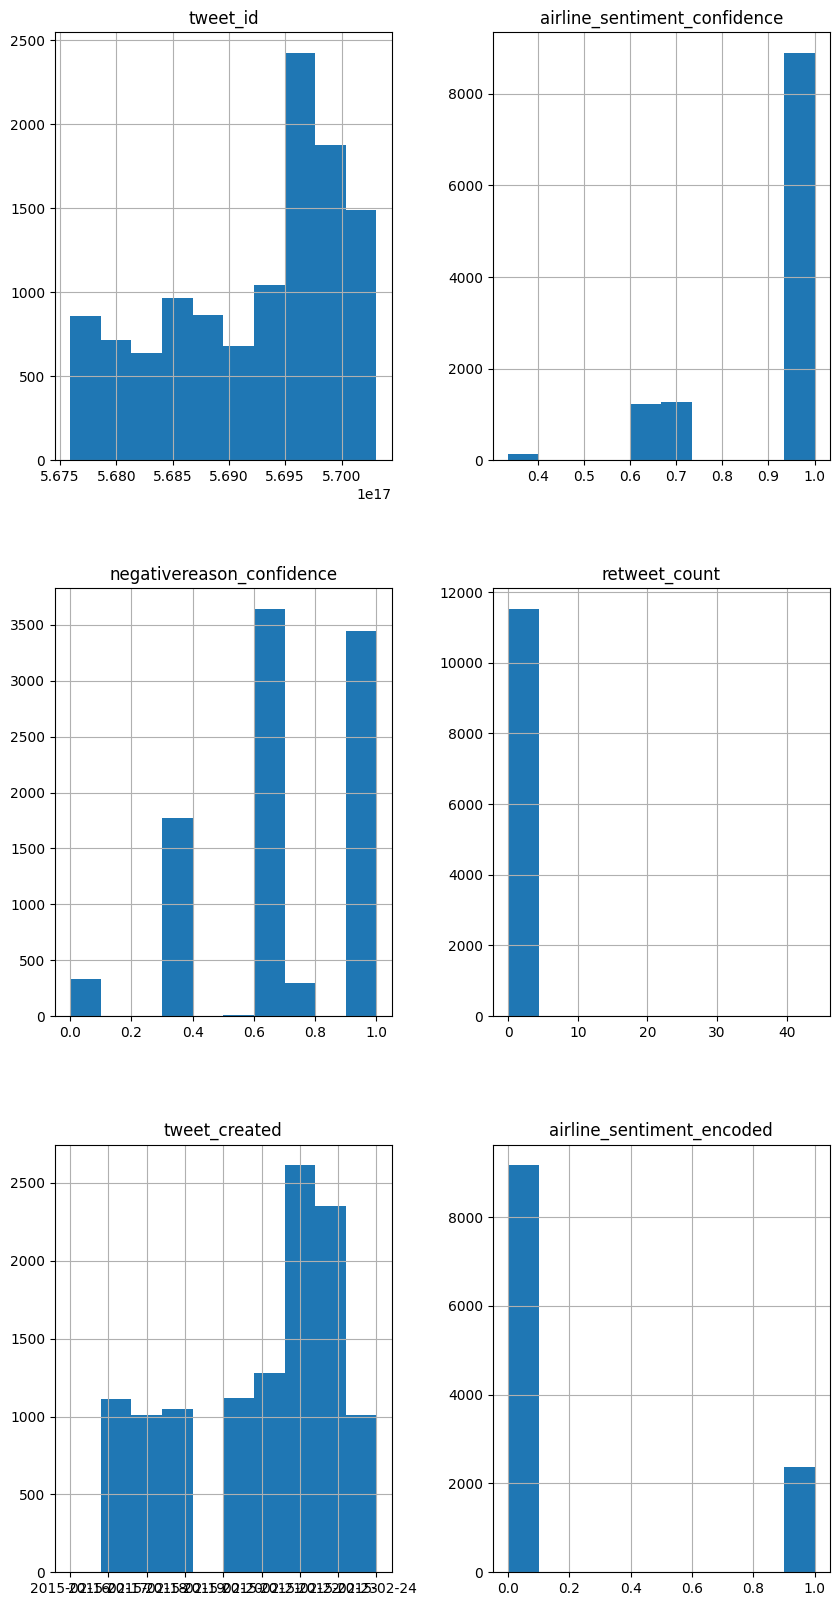

In [530]:
data.hist(figsize=(10,20))

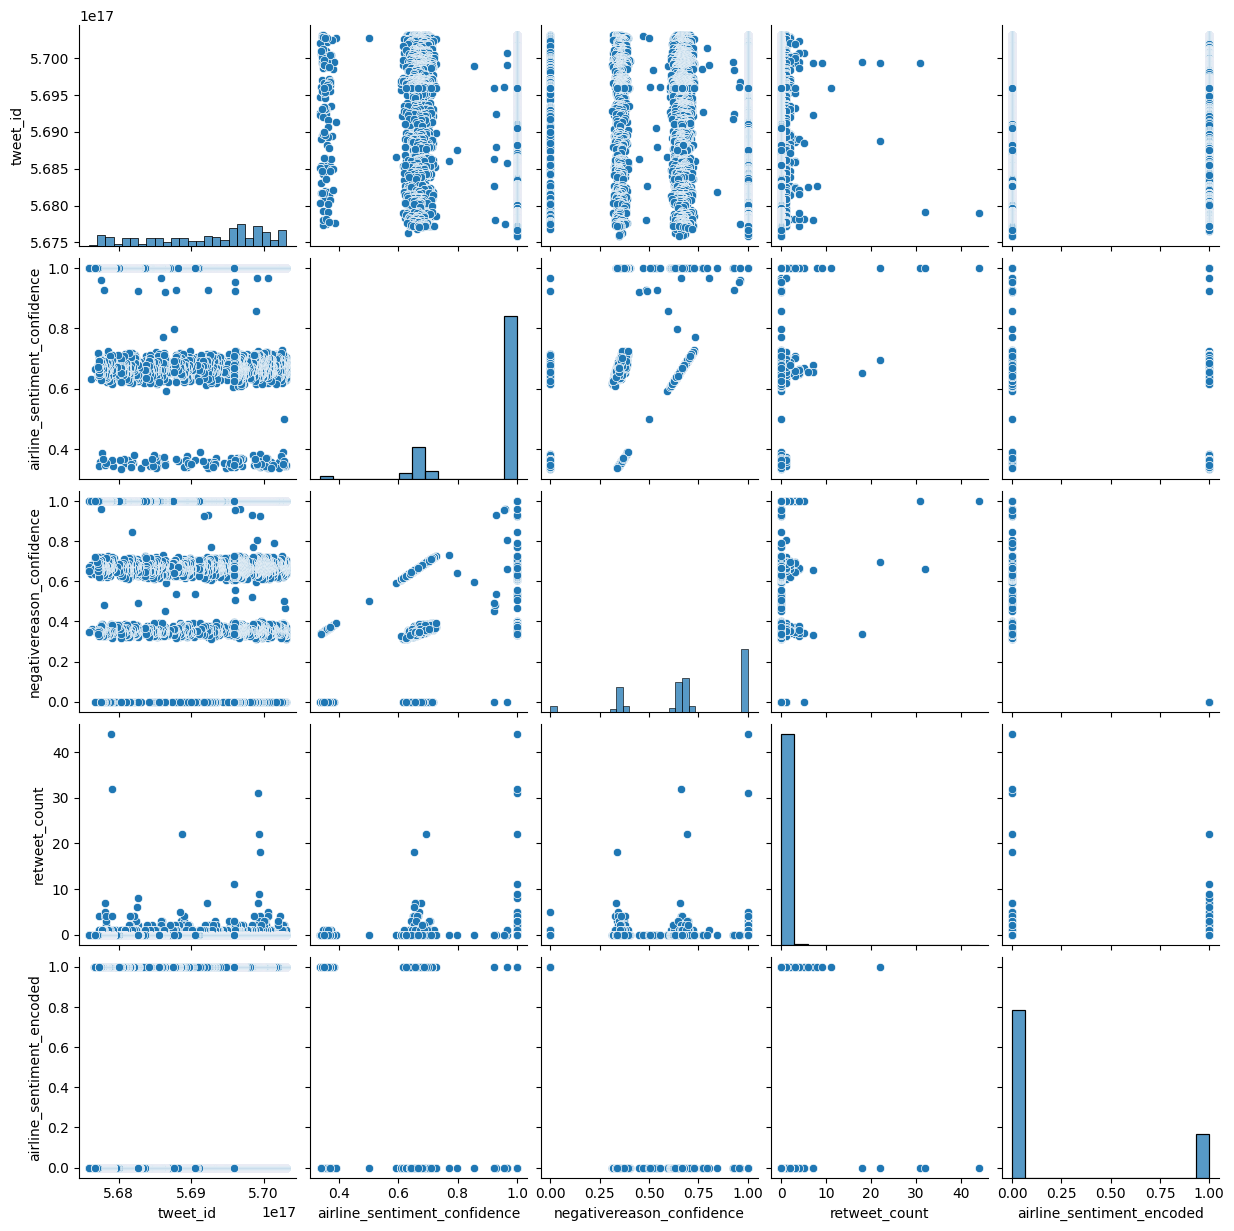

In [531]:
sns.pairplot(data)

<AxesSubplot: >

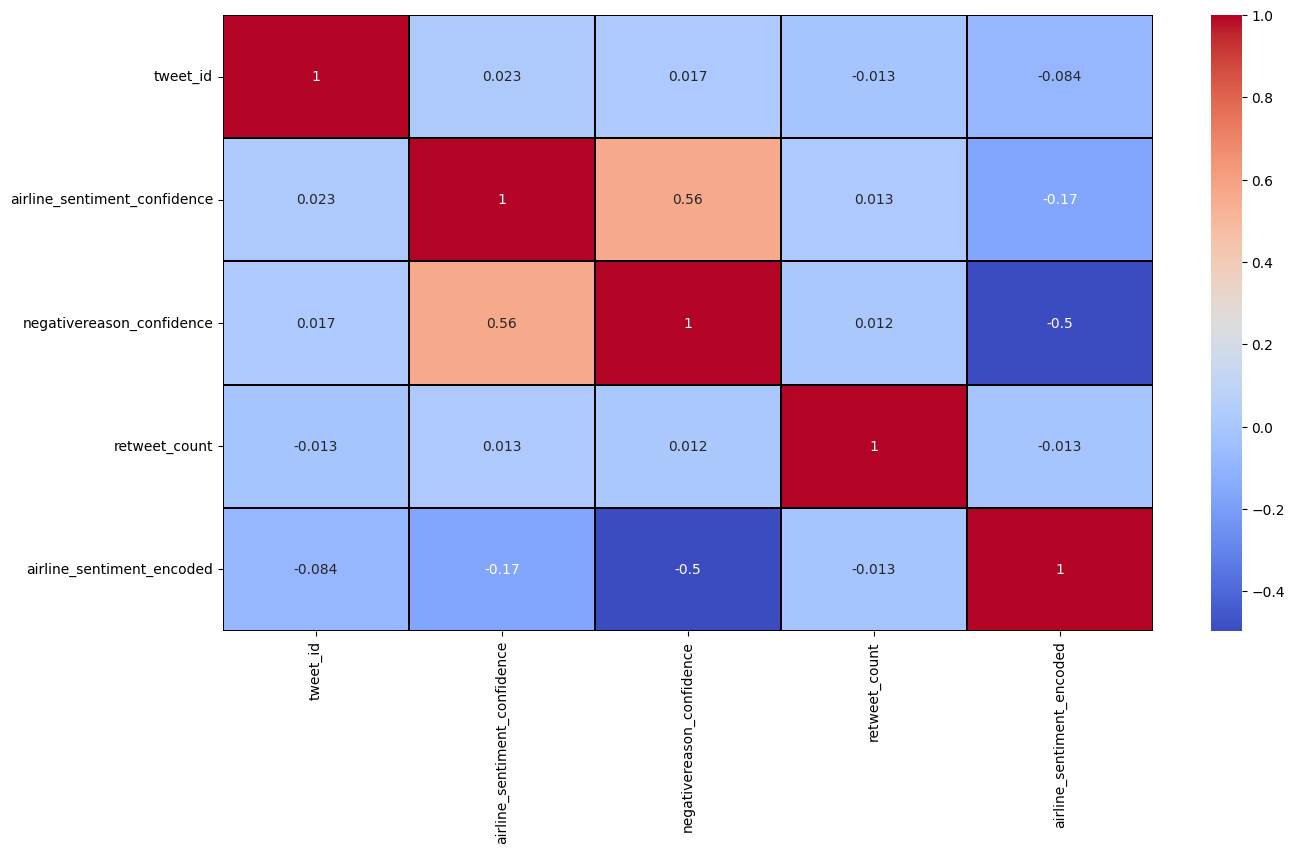

In [532]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidths=0.2,linecolor='black')

<AxesSubplot: xlabel='airline', ylabel='count'>

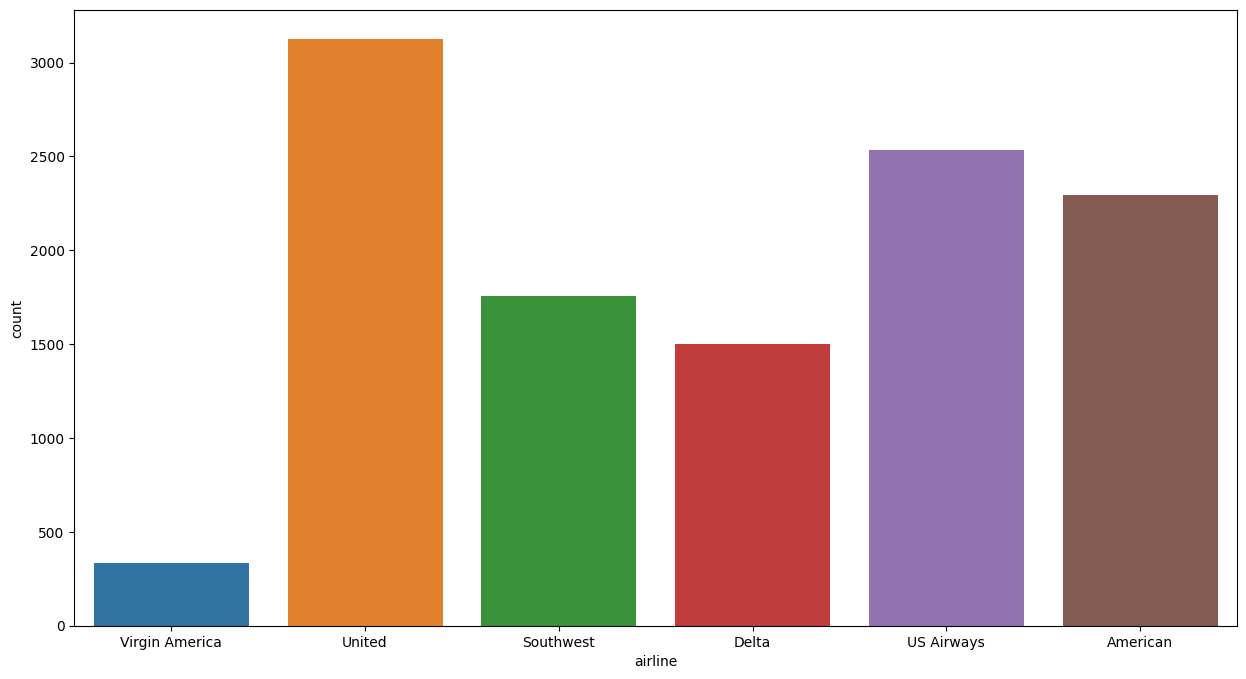

In [533]:
sns.countplot(data,x="airline")

<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

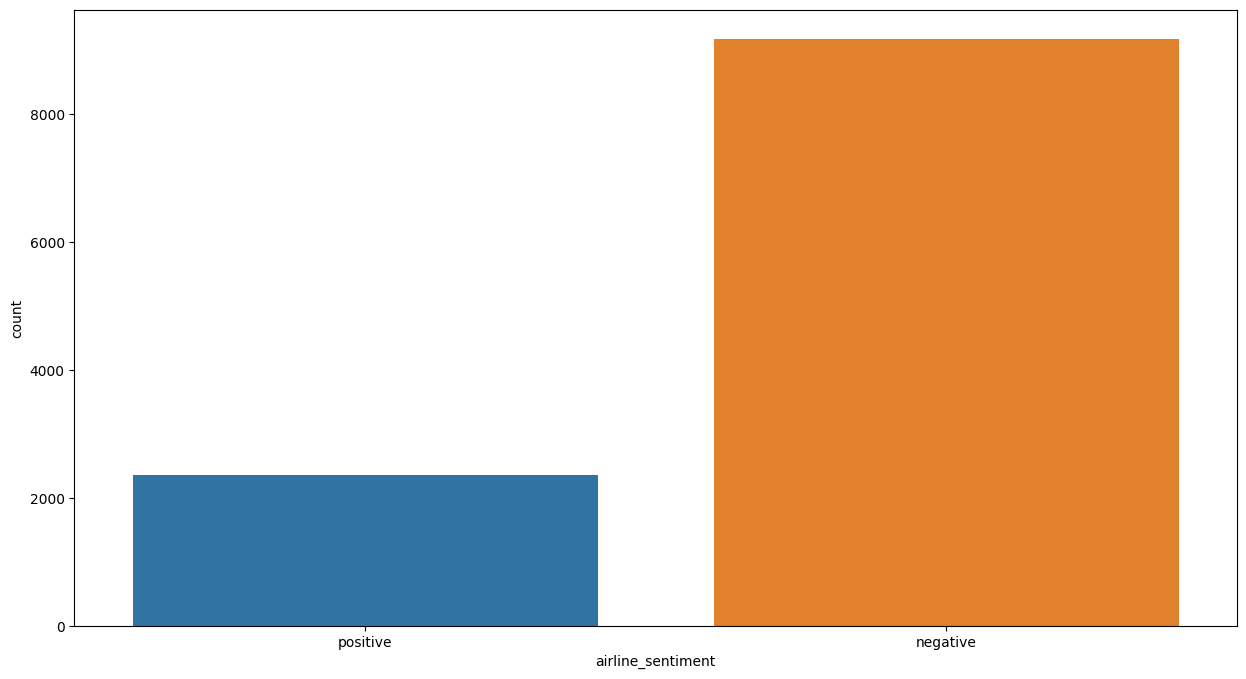

In [534]:
sns.countplot(data=data, x="airline_sentiment")

**DATA CLEANING**

In [535]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [536]:
nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [537]:
x = data.clean_tweet
y = data.airline_sentiment

In [538]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


In [539]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=5000)
vect.fit(x_train)
print(len(x_train))

8655


In [540]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)
print(x_train_dtm.shape)
print(x_test_dtm.shape)

(8655, 5000)
(2886, 5000)


**SVM MODEL**

In [541]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,roc_auc_score

In [542]:
# Define a function to convert text labels to numerical values
def label_to_numeric(label):
    return 1 if label == 'positive' else 0


In [543]:
#training SVM model with linear kernel
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)

SVC(kernel='linear', random_state=10)

In [544]:
#run a normal SVM
svm_model = SVC(probability=True,kernel='linear')
params_grid={'C':[0.0001,0.001,0.01,0.1,0.2]}

In [545]:
#randomized search
# linear_random_search = RandomizedSearchCV(svm_model,params_grid,scoring='roc_auc',cv=5,verbose=2)
# linear_random_search.fit(x_train_dtm,y_train)

In [546]:
text_svm = linear_random_search.best_estimator_
text_svm

SVC(C=0.2, kernel='linear', probability=True)

In [547]:
y_pred= text_svm.predict(x_test_dtm)
# Convert y_pred_text to numerical values
y_pred_labels = [label_to_numeric(label) for label in y_pred]
print(len(y_pred_labels))
# #print roc_auc score
print('ROC_AUC Score: ',roc_auc_score(y_test,y_pred_labels))
svm_roc =roc_auc_score(y_test,y_pred_labels)
#print accuracy
print('Accuracy: ',accuracy_score(y_test,y_pred))

2886
ROC_AUC Score:  0.834522563384611
Accuracy:  0.9123354123354124


In [548]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.93      0.96      0.95      2323
    positive       0.82      0.71      0.76       563

    accuracy                           0.91      2886
   macro avg       0.88      0.83      0.85      2886
weighted avg       0.91      0.91      0.91      2886



In [549]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2235,   88],
       [ 165,  398]], dtype=int64)

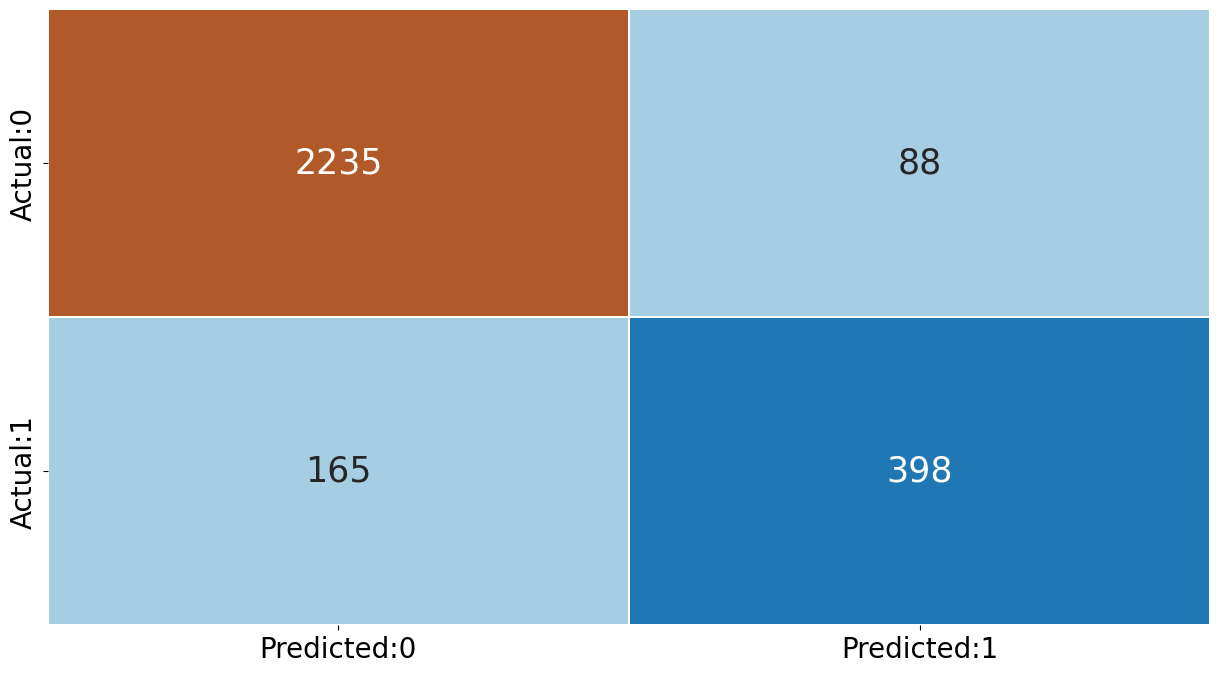

In [550]:
plt.rcParams['figure.figsize'] = [15,8]
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

**DECISION TREES**

In [551]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [552]:
A = data.clean_tweet
y = data.airline_sentiment

In [553]:
countvect = CountVectorizer(max_features=5000)
A_Clean =  countvect.fit_transform(A)

In [554]:
# Using Smote to to balance the data if imbalanced
imbalance = SMOTE()
x_sm,y_sm = imbalance.fit_resample(A_Clean,y)

In [555]:
A_train , A_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

In [556]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(A_train,y_train)
decision_tree_pred=decision_tree.predict(A_test)

In [557]:
decision_tree_pred_labels = [label_to_numeric(label) for label in decision_tree_pred]
# #print roc_auc score
print('ROC_AUC Score: ',roc_auc_score(y_test,decision_tree_pred_labels))
decisiontree_roc =roc_auc_score(y_test,decision_tree_pred_labels)
#print accuracy
print('Accuracy: ',accuracy_score(y_test,decision_tree_pred))

ROC_AUC Score:  0.8653670500355253
Accuracy:  0.8662017868816736


In [558]:
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

    negative       0.92      0.80      0.86      2265
    positive       0.83      0.93      0.88      2324

    accuracy                           0.87      4589
   macro avg       0.87      0.87      0.87      4589
weighted avg       0.87      0.87      0.87      4589



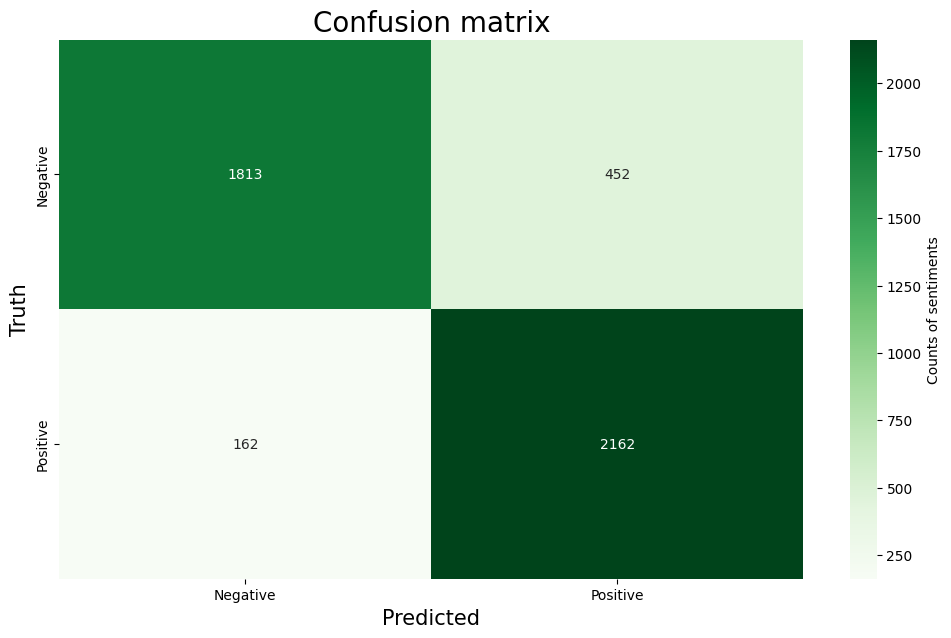

In [559]:
cm_dsn = confusion_matrix(y_test,decision_tree_pred)

# plot confusion matrix 
plt.figure(figsize=(12,7))
sentiment_classes = ['Negative', 'Positive']
sb.heatmap(cm_dsn, cmap=plt.cm.Greens, annot=True,cbar_kws={'label': 'Counts of sentiments'},  fmt='d',  
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

**RANDOM FOREST**

In [560]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [561]:
B = data.clean_tweet
C = data.airline_sentiment

In [562]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [563]:
vectorizer = CountVectorizer(max_features=5000)

In [564]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [565]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [566]:
y_pred = rf_classifier.predict(X_test)

In [567]:
y_pred_labels = [label_to_numeric(label) for label in y_pred]
# #print roc_auc score
print('ROC_AUC Score: ',roc_auc_score(y_test,y_pred_labels))
#print accuracy
randomforest_roc =roc_auc_score(y_test,y_pred_labels)
print('Accuracy: ',accuracy_score(y_test,y_pred))

ROC_AUC Score:  0.8138623163854027
Accuracy:  0.89172802078822


In [568]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.93      0.94      0.93      1862
    positive       0.74      0.69      0.71       447

    accuracy                           0.89      2309
   macro avg       0.83      0.81      0.82      2309
weighted avg       0.89      0.89      0.89      2309



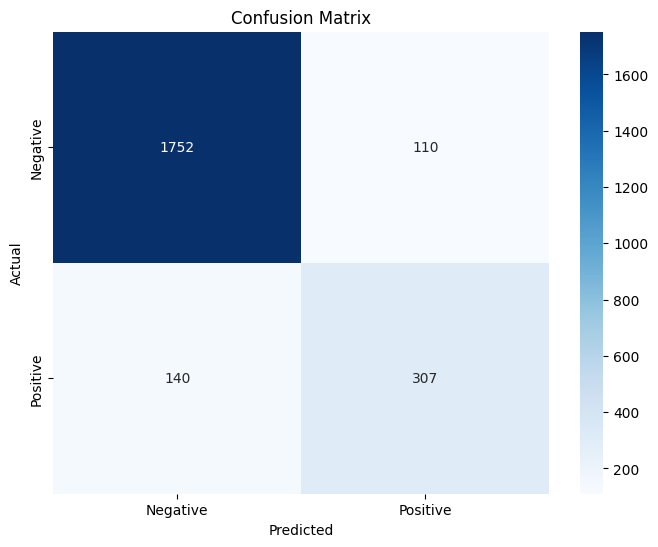

In [569]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**STOCHASTIC GRADIENT**

In [570]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [571]:
B = data.clean_tweet
C = data.airline_sentiment

In [572]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)
#print shape of each
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9232,)
(2309,)
(9232,)
(2309,)


In [573]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [574]:
# Initialize and train the SGD Classifier
sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)  # 'log' for logistic regression (binary classification)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [575]:
y_pred = sgd_classifier.predict(X_test)

In [576]:
y_pred_labels = [label_to_numeric(label) for label in y_pred]
# #print roc_auc score
print('ROC_AUC Score: ',roc_auc_score(y_test,y_pred_labels))
SGD_roc =roc_auc_score(y_test,y_pred_labels)
#print accuracy
print('Accuracy: ',accuracy_score(y_test,y_pred))

ROC_AUC Score:  0.8365947226647635
Accuracy:  0.9146816803811174


In [577]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.96      0.95      1862
    positive       0.83      0.71      0.76       447

    accuracy                           0.91      2309
   macro avg       0.88      0.84      0.86      2309
weighted avg       0.91      0.91      0.91      2309



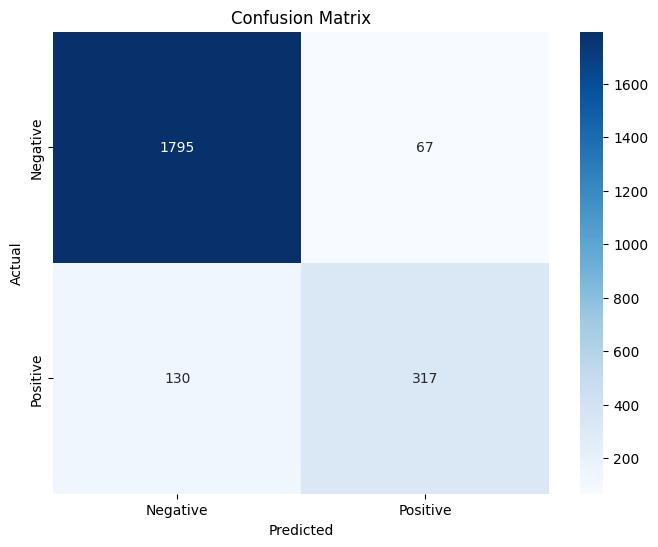

In [578]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**BAYES CLASSIFIER**

In [579]:
from sklearn.naive_bayes import MultinomialNB

In [580]:
B = data.clean_tweet
C = data.airline_sentiment

In [581]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)
#print shape of each
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9232,)
(2309,)
(9232,)
(2309,)


In [582]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [583]:
bayes = MultinomialNB(alpha=0.45833).fit(X_train, y_train)

In [584]:
y_pred=bayes.predict(X_test)

In [585]:
y_pred_labels = [label_to_numeric(label) for label in y_pred]
# #print roc_auc score
print('ROC_AUC Score: ',roc_auc_score(y_test,y_pred_labels))
bayes_roc =roc_auc_score(y_test,y_pred_labels)
#print accuracy
print('Accuracy: ',accuracy_score(y_test,y_pred))

ROC_AUC Score:  0.850328722092864
Accuracy:  0.9107838891294933


In [586]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.95      0.94      1862
    positive       0.78      0.75      0.77       447

    accuracy                           0.91      2309
   macro avg       0.86      0.85      0.86      2309
weighted avg       0.91      0.91      0.91      2309



**ENSEMBLE** 

In [587]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [588]:

X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)

In [589]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [590]:
#Random Forest and SGD
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)

In [591]:

#VotingClassifier is an ensemble learning method that combines the predictions of multiple base classifiers to make a final decision.
voting_classifier = VotingClassifier(estimators=[
    ('RandomForest', random_forest_classifier),
    ('SGD', sgd_classifier)
], voting='hard')

In [592]:
y_pred_labels = [label_to_numeric(label) for label in y_pred]
# #print roc_auc score
print('ROC_AUC Score: ',roc_auc_score(y_test,y_pred_labels))
ensemble_roc =roc_auc_score(y_test,y_pred_labels)
#print accuracy
print('Accuracy: ',accuracy_score(y_test,y_pred))

ROC_AUC Score:  0.850328722092864
Accuracy:  0.9107838891294933


In [593]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.95      0.94      1862
    positive       0.78      0.75      0.77       447

    accuracy                           0.91      2309
   macro avg       0.86      0.85      0.86      2309
weighted avg       0.91      0.91      0.91      2309



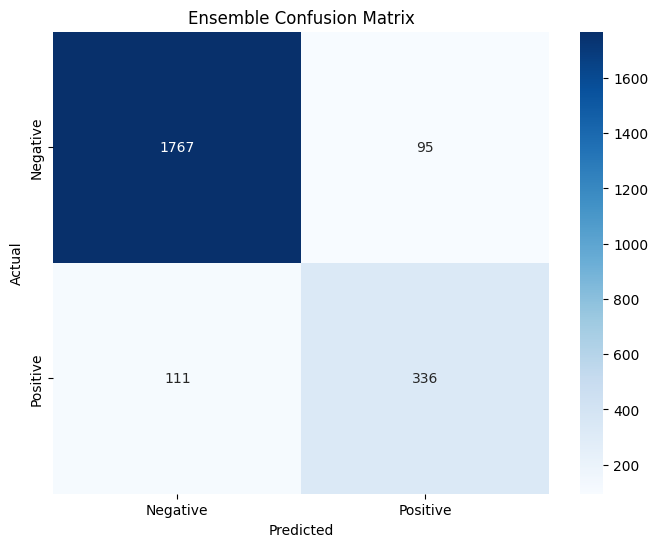

In [594]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Confusion Matrix')
plt.show()

**SUMMARY**

In [595]:
B = data.clean_tweet
C = data.airline_sentiment

In [596]:
X_train, X_test, y_train, y_test = train_test_split(B, C, test_size=0.2, random_state=42)
#print shape of each
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9232,)
(2309,)
(9232,)
(2309,)


In [597]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [602]:
#BUILD A SINGLE BAR CHART FOR ALL MODELS SHOWING THEIR ROC SCORES SDE BY SIDE
roc_auc_scores = pd.DataFrame(columns=['Model','ROC_AUC'])
roc_auc_scores.loc[0] = ['SVM',svm_roc]
roc_auc_scores.loc[1] = ['tree_clf',decisiontree_roc]
roc_auc_scores.loc[2] = ['randomforestclf',randomforest_roc ]
roc_auc_scores.loc[3] = ['ensemble', ensemble_roc]
roc_auc_scores.loc[4] = ['bayes_clf',bayes_roc]
roc_auc_scores.loc[5] = ['sgd_clf',SGD_roc]
roc_auc_scores


,Model,ROC_AUC
0,SVM,0.834523
1,tree_clf,0.865367
2,randomforestclf,0.813862
3,ensemble,0.850329
4,bayes_clf,0.850329
5,sgd_clf,0.836595


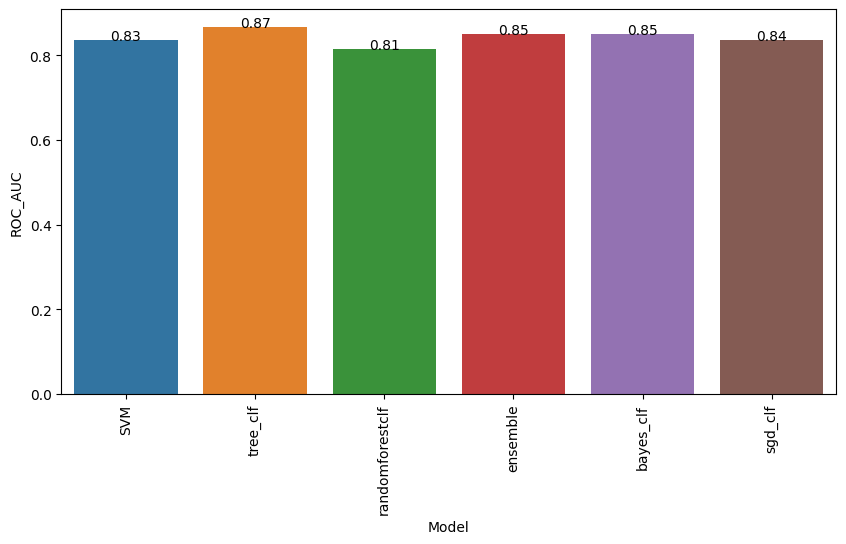

In [603]:
#make a bar chart to show the highest values of roc_auc with values also printed
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='ROC_AUC',data=roc_auc_scores)
plt.xticks(rotation=90)
for i in range(len(roc_auc_scores)):
    plt.text(i,roc_auc_scores['ROC_AUC'][i],round(roc_auc_scores['ROC_AUC'][i],2),ha='center')
plt.show()

as we can see a simple deciison tree has the highest ROC_AUC score hence it will be best 